Problem Description
Imagine a company produces two products: A and B. The profit from each unit of Product A is $20, and from Product B is $30. The production of these products requires two types of resources: labor and material. Each unit of Product A requires 1 hour of labor and 2 units of material. Each unit of Product B requires 3 hours of labor and 1 unit of material. The company has a total of 100 hours of labor and 100 units of material available. The goal is to determine how many units of each product the company should produce to maximize profit.

Mathematical Formulation
Objective Function:
Maximize 
Z=20A+30B
Maximize Z=20A+30B
Constraints:
Labor Constraint: A+3B≤100
Material Constraint: 2A+B≤100
Non-negativity Constraint: 
A,B≥0
Where:
A = units of Product A to produce.
B = units of Product B to produce.
Z = Total profit.

In [3]:
!pip install pulp


  Obtaining dependency information for pulp from https://files.pythonhosted.org/packages/09/d7/57e71e11108203039c895643368c0d1a99fe719a6a80184edf240c33d25f/PuLP-2.8.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 7.5 MB/s eta 0:00:0000:0100:01


In [1]:
import pulp

# Create a problem variable:
problem = pulp.LpProblem("Maximize Profit", pulp.LpMaximize)

# Create decision variables:
A = pulp.LpVariable("A", lowBound=0, cat='Continuous')  # Units of Product A
B = pulp.LpVariable("B", lowBound=0, cat='Continuous')  # Units of Product B

# Objective function:
problem += 20 * A + 30 * B, "Total Profit"

# Constraints:
problem += A + 3 * B <= 100, "Labor Constraint"
problem += 2 * A + B <= 100, "Material Constraint"

# Solve the problem:
problem.solve()

# Print the results:
print("Production of Product A:", pulp.value(A))
print("Production of Product B:", pulp.value(B))
print("Maximum Profit:", pulp.value(problem.objective))


c:\Users\sony.gosala\.conda\envs\mne\lib\site-packages\pulp\pulp.py:1316: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


Production of Product A: 40.0
Production of Product B: 20.0
Maximum Profit: 1400.0


Solving a linear programming problem without the use of specialized libraries like PuLP or other optimization libraries in Python can be educational and provide deeper insight into the mechanics of optimization algorithms. Here, I’ll show you how to manually implement the Simplex algorithm in Python for the example problem we discussed. This will involve more complex coding and a good understanding of the Simplex method.

The Simplex Method
The Simplex algorithm is a popular method for solving linear programming problems. It operates on linear programs in standard form and typically follows these steps:

Convert to Standard Form: Ensure all constraints are in "≤" form with non-negative right-hand side.
Slack Variables: Add slack variables to convert inequalities into equalities.
Formulate the Initial Simplex Tableau: Create a tableau to keep track of the coefficients of the variables, including the objective function and constraints.
Pivot Operations: Perform pivot operations to move towards optimality. This involves selecting a pivot element to enter the basis and a pivot row to leave the basis.
Iteration to Optimality: Repeat the pivot operations until no further improvements can be made (no positive coefficients in the objective row).
Python Implementation

In [2]:
import numpy as np

def pivot_index(tableau):
    # Find entering variable (most negative coefficient in objective function)
    col = np.argmin(tableau[0, :-1])
    if tableau[0, col] >= 0:
        return -1, -1  # Indicates optimal solution reached

    # Find leaving variable using ratio test (minimum ratio for positive coefficients)
    ratios = [tableau[i, -1] / tableau[i, col] if tableau[i, col] > 0 else float('inf') for i in range(1, len(tableau))]
    row = ratios.index(min(ratios)) + 1

    return row, col

def perform_pivot(tableau, row, col):
    # Normalize pivot row
    tableau[row, :] /= tableau[row, col]

    # Zero out other entries in pivot column
    for i in range(len(tableau)):
        if i != row:
            tableau[i, :] -= tableau[i, col] * tableau[row, :]

def simplex_method(A, b, c):
    # Construct the initial tableau
    nrows, ncols = A.shape
    tableau = np.zeros((nrows + 1, ncols + nrows + 1))
    tableau[1:, :-1] = np.hstack([A, np.eye(nrows)])  # Add slack variables
    tableau[1:, -1] = b
    tableau[0, :ncols] = -c  # Objective function coefficients

    # Perform Simplex iterations
    while True:
        row, col = pivot_index(tableau)
        if row == -1:
            break
        perform_pivot(tableau, row, col)

    return tableau[0, -1], tableau[1:, -1]  # Return max value and variables

# Problem specifics
A = np.array([[1, 3], [2, 1]])  # Coefficients for constraints
b = np.array([100, 100])       # Right-hand side values
c = np.array([20, 30])         # Coefficients for objective function

# Solving the problem
max_profit, variables = simplex_method(A, b, c)
print("Maximum Profit:", max_profit)
print("Units of Product A and B:", variables[:2])


Maximum Profit: 1400.0
Units of Product A and B: [20. 40.]


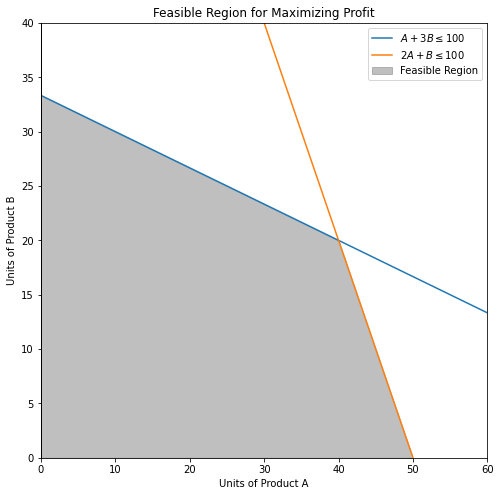

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Define the range for the variables
x = np.linspace(0, 100, 400)  # A reasonable range for A

# Constraints
y1 = (100 - x) / 3  # A + 3B <= 100 rearranged to B
y2 = 100 - 2 * x    # 2A + B <= 100 rearranged to B

# Create the plot
plt.figure(figsize=(8, 8))
plt.xlim((0, 60))
plt.ylim((0, 40))

# Add the constraint lines
plt.plot(x, y1, label=r'$A + 3B \leq 100$')
plt.plot(x, y2, label=r'$2A + B \leq 100$')

# Add non-negativity constraints
plt.axhline(0, color='black', lw=1)
plt.axvline(0, color='black', lw=1)

# Fill feasible region
y3 = np.minimum(y1, y2)
plt.fill_between(x, 0, y3, where=(x>=0) & (y3>=0), color='gray', alpha=0.5, label='Feasible Region')

# Labels and legends
plt.xlabel('Units of Product A')
plt.ylabel('Units of Product B')
plt.title('Feasible Region for Maximizing Profit')
plt.legend()

# Show plot
plt.show()


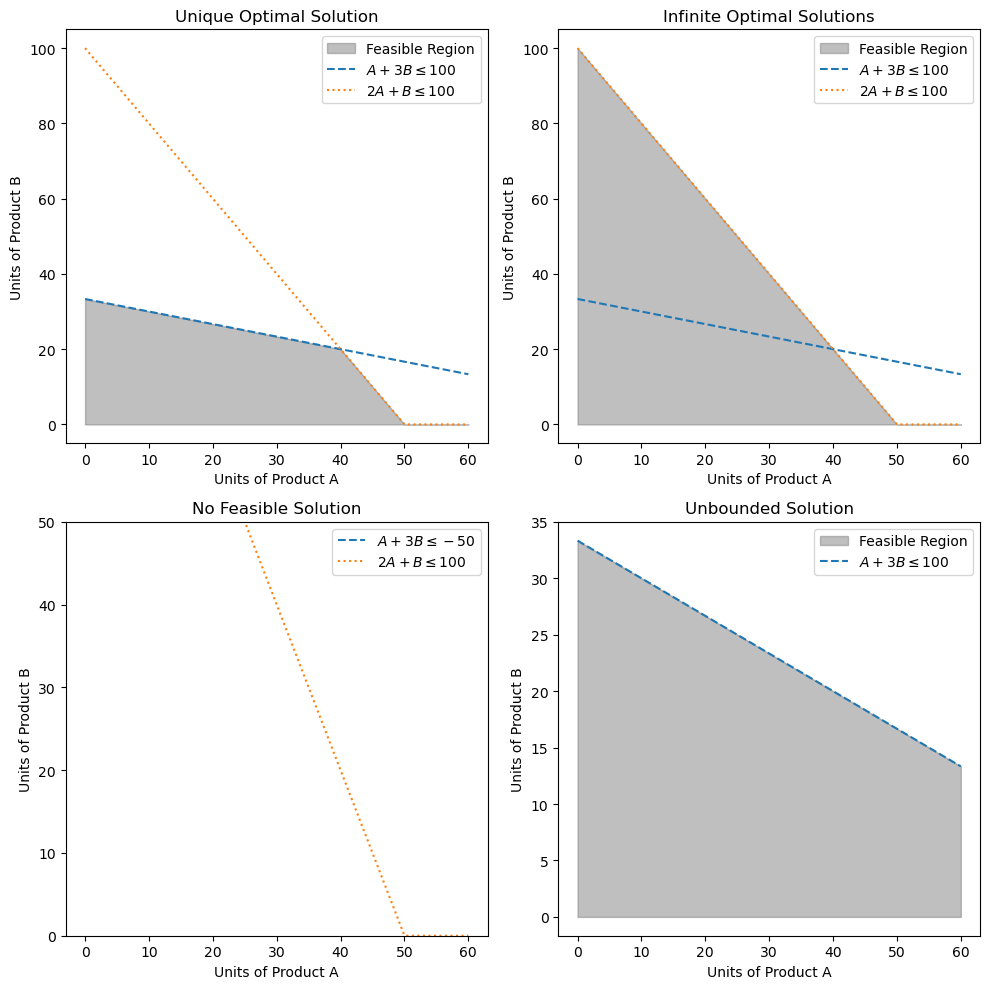

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Generate x values
x = np.linspace(0, 60, 400)  # A reasonable range for A, ensuring all plots are consistent

# Define the constraints
y1 = (100 - x) / 3  # Constraint: A + 3B <= 100
y2 = 100 - 2 * x    # Constraint: 2A + B <= 100

# Ensure non-negative B values
y1 = np.maximum(0, y1)
y2 = np.maximum(0, y2)

# Set up a larger figure for better visualization
plt.figure(figsize=(10, 10))

# Plotting each scenario

## Plot for Unique Optimal Solution
plt.subplot(221)
plt.fill_between(x, 0, np.minimum(y1, y2), color='gray', alpha=0.5, label='Feasible Region')
plt.plot(x, y1, label=r'$A + 3B \leq 100$', linestyle='dashed')
plt.plot(x, y2, label=r'$2A + B \leq 100$', linestyle='dotted')
plt.title('Unique Optimal Solution')
plt.xlabel('Units of Product A')
plt.ylabel('Units of Product B')
plt.legend()

## Plot for Infinite Optimal Solutions
plt.subplot(222)
plt.fill_between(x, 0, y2, color='gray', alpha=0.5, label='Feasible Region')
plt.plot(x, y1, label=r'$A + 3B \leq 100$', linestyle='dashed')
plt.plot(x, y2, label=r'$2A + B \leq 100$', linestyle='dotted')
plt.title('Infinite Optimal Solutions')
plt.xlabel('Units of Product A')
plt.ylabel('Units of Product B')
plt.legend()

## Plot for No Feasible Solution
plt.subplot(223)
plt.plot(x, y1 - 150, label=r'$A + 3B \leq -50$', linestyle='dashed')  # Infeasible adjustment
plt.plot(x, y2, label=r'$2A + B \leq 100$', linestyle='dotted')
plt.title('No Feasible Solution')
plt.xlabel('Units of Product A')
plt.ylabel('Units of Product B')
plt.legend()
plt.ylim(0, 50)  # Adjust y-limits to focus on the relevant area

## Plot for Unbounded Solution
plt.subplot(224)
plt.fill_between(x, 0, y1, color='gray', alpha=0.5, label='Feasible Region')
plt.plot(x, y1, label=r'$A + 3B \leq 100$', linestyle='dashed')
plt.title('Unbounded Solution')
plt.xlabel('Units of Product A')
plt.ylabel('Units of Product B')
plt.legend()

plt.tight_layout()
plt.show()
